In [1]:
#imdb dataset
#simpleRNN

In [6]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

Using TensorFlow backend.


In [8]:
print('Loading data...')
(input_train, y_train),(input_test,y_test) = imdb.load_data(num_words=max_features)
print(len(input_train),'train sequence')
print(len(input_test),'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train,maxlen=maxlen)
input_test = sequence.pad_sequences(input_test,maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape', input_test.shape)

Loading data...
25000 train sequence
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape (25000, 500)


In [14]:
from keras.layers import Dense,Embedding,SimpleRNN
from keras.models import Sequential

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer = 'rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.6131 - acc: 0.6693 - val_loss: 0.4520 - val_acc: 0.8286
Epoch 2/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3921 - acc: 0.8437 - val_loss: 0.4496 - val_acc: 0.8020
Epoch 3/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.3032 - acc: 0.8824 - val_loss: 0.3136 - val_acc: 0.8758
Epoch 4/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.2379 - acc: 0.9099 - val_loss: 0.3952 - val_acc: 0.8278
Epoch 5/10
20000/20000 [==============================] - 29s 1ms/step - loss: 0.2079 - acc: 0.9209 - val_loss: 0.3814 - val_acc: 0.8276
Epoch 6/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.1578 - acc: 0.9431 - val_loss: 0.3565 - val_acc: 0.8686
Epoch 7/10
20000/20000 [==============================] - 28s 1ms/step - loss: 0.

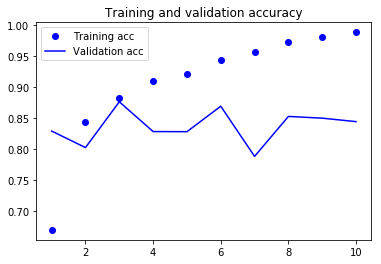

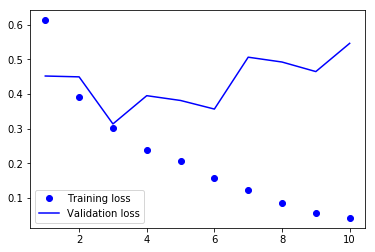

In [16]:
#plotting results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

plt.show()

In [17]:
model.evaluate(input_test,y_test)

25000/25000 [==============================] - 37s 1ms/step


[0.5714174214696884, 0.83584]